In [2]:

import pandas as pd

data_mat=pd.read_csv("student-mat.csv",sep=";") 
data_por=pd.read_csv("student-por.csv",sep=";") 

data_mat

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [3]:
#1
from IPython.core.display import HTML

df_mat=data_mat[["school", "sex", "age", "address", "Pstatus", "guardian", "traveltime",
                 "studytime", "failures", "paid", "internet", "health", "absences", "G1","G2","G3"]]
                
df_por=data_por[["school", "sex", "age", "address", "Pstatus", "guardian", "traveltime",
                 "studytime", "failures", "paid", "internet", "health", "absences", "G1","G2","G3"]]   
 
#display(HTML(df_por.to_html()))

df_mat_sep=df_mat.groupby(["school"]) 
df_por_sep=df_por.groupby(["school"])

for key,group in df_mat_sep:
    
    if key=="GP":
        #print(f"la key es: {key} y el grupo es : \n{group}")
        gp_mat=group 
    
    elif key=="MS":
        #print(f"la key es: {key} y el grupo es : \n{group}") 
        ms_mat=group

for key,group in df_por_sep:
    
    if key=="GP":
        #print(f"la key es: {key} y el grupo es : \n{group}")
        gp_por=group 
    
    elif key=="MS":
        #print(f"la key es: {key} y el grupo es : \n{group}") 
        ms_por=group

display(HTML(gp_mat.to_html()))
display(HTML(ms_por.to_html()))

,school,sex,age,address,Pstatus,guardian,traveltime,studytime,failures,paid,internet,health,absences,G1,G2,G3
0,GP,F,18,U,A,mother,2,2,0,no,no,3,6,5,6,6
1,GP,F,17,U,T,father,1,2,0,no,yes,3,4,5,5,6
2,GP,F,15,U,T,mother,1,2,3,yes,yes,3,10,7,8,10
3,GP,F,15,U,T,mother,1,3,0,yes,yes,5,2,15,14,15
4,GP,F,16,U,T,father,1,2,0,yes,no,5,4,6,10,10
5,GP,M,16,U,T,mother,1,2,0,yes,yes,5,10,15,15,15
6,GP,M,16,U,T,mother,1,2,0,no,yes,3,0,12,12,11
7,GP,F,17,U,A,mother,2,2,0,no,no,1,6,6,5,6
8,GP,M,15,U,A,mother,1,2,0,yes,yes,1,0,16,18,19
9,GP,M,15,U,T,mother,1,2,0,yes,yes,5,0,14,15,15


,school,sex,age,address,Pstatus,guardian,traveltime,studytime,failures,paid,internet,health,absences,G1,G2,G3
423,MS,F,16,U,T,father,2,1,0,no,yes,5,11,10,11,11
424,MS,F,16,R,T,mother,2,2,0,no,yes,5,0,12,12,12
425,MS,F,15,R,T,mother,1,1,1,no,no,2,6,10,10,10
426,MS,F,15,R,T,mother,2,1,0,no,yes,5,4,10,10,11
427,MS,F,16,R,T,mother,2,2,0,no,no,5,0,16,17,17
428,MS,F,15,R,T,mother,2,1,0,no,no,1,0,6,8,9
429,MS,M,16,R,A,mother,1,2,0,no,no,2,5,10,11,11
430,MS,M,16,U,A,mother,1,3,0,no,yes,5,0,10,11,11
431,MS,F,17,R,T,father,1,2,1,no,no,5,0,10,10,10
432,MS,F,17,R,T,father,1,1,1,no,yes,5,0,6,6,7


In [4]:
#2
gp_mat=gp_mat.dropna(how="any",axis=0)#dropna elimina valores nulos, axis 0 indica filas
gp_por=gp_por.dropna(how="any",axis=0)
ms_mat=ms_mat.dropna(how="any",axis=0)
ms_por=ms_por.dropna(how="any",axis=0)

df_mat=df_mat.dropna(how="any",axis=0)
df_por=df_por.dropna(how="any",axis=0)

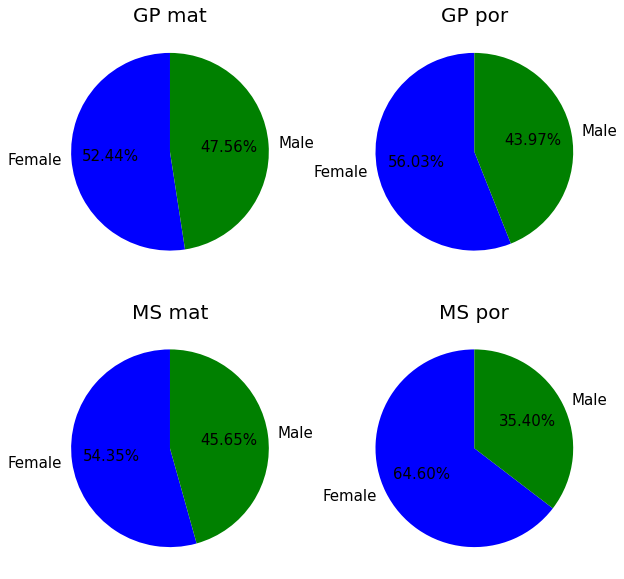

In [11]:
#3
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
ax1=plt.subplot(221)
ax2=plt.subplot(222)
ax3=plt.subplot(223)
ax4=plt.subplot(224)

ax1.pie(gp_mat["sex"].value_counts(),labels=["Female","Male"],autopct="%.2f%%",colors=["blue","green"],startangle=90,textprops={"fontsize":15})
ax2.pie(gp_por["sex"].value_counts(),labels=["Female","Male"],autopct="%.2f%%",colors=["blue","green"],startangle=90,textprops={"fontsize":15})
ax3.pie(ms_mat["sex"].value_counts(),labels=["Female","Male"],autopct="%.2f%%",colors=["blue","green"],startangle=90,textprops={"fontsize":15})
ax4.pie(ms_por["sex"].value_counts(),labels=["Female","Male"],autopct="%.2f%%",colors=["blue","green"],startangle=90,textprops={"fontsize":15})

ax1.set_title("GP mat",fontsize=20)
ax2.set_title("GP por",fontsize=20)
ax3.set_title("MS mat",fontsize=20)
ax4.set_title("MS por",fontsize=20)

plt.show()

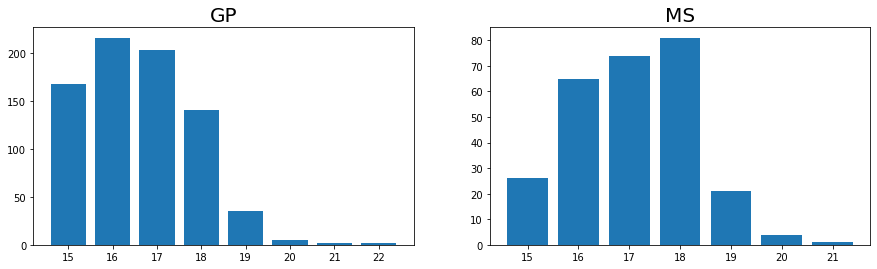

In [10]:
#4
gp=pd.concat([gp_mat,gp_por])
ms=pd.concat([ms_mat,ms_por])

plt.figure(figsize=(15,4))
ax1=plt.subplot(121)
ax2=plt.subplot(122)

ax1.bar(gp["age"].value_counts().index,gp["age"].value_counts().values)
ax2.bar(ms["age"].value_counts().index,ms["age"].value_counts().values)
ax1.set_title("GP",fontsize=20)
ax2.set_title("MS",fontsize=20)

plt.show()

In [12]:
#5
print("La edad promedio en la el curso de matematicas de la escuela GP es: ",gp_mat["age"].mean())
print("La edad promedio en la el curso de portugues de la escuela GP es: ",gp_por["age"].mean())
print("La edad promedio en la el curso de matematicas de la escuela MS es: ",ms_mat["age"].mean())
print("La edad promedio en la el curso de portugues de la escuela MS es: ",ms_por["age"].mean())

La edad promedio en la el curso de matematicas de la escuela GP es:  16.521489971346703
La edad promedio en la el curso de portugues de la escuela GP es:  16.666666666666668
La edad promedio en la el curso de matematicas de la escuela MS es:  18.02173913043478
La edad promedio en la el curso de portugues de la escuela MS es:  16.88938053097345


In [13]:
#6
grades_gp_mat = gp_mat[["G1", "G2", "G3"]]
avg_gp_mat =grades_gp_mat.mean()
print("Colegio GP curso de Matematicas \n")
print(avg_gp_mat)
print("___________________________________")

grades_gp_por = gp_por[["G1", "G2", "G3"]]
avg_gp_por =grades_gp_por.mean()
print("Colegio GP curso de Portugues \n")
print(avg_gp_por)
print("___________________________________")

grades_ms_mat = ms_mat[["G1", "G2", "G3"]]
avg_ms_mat =grades_ms_mat.mean()
print("Colegio MS curso de Matematicas \n")
print(avg_ms_mat)
print("___________________________________")

grades_ms_por = ms_por[["G1", "G2", "G3"]]
avg_ms_por =grades_ms_por.mean()
print("Colegio MS curso de Portugues \n")
print(avg_ms_por)
print("___________________________________")

Colegio GP curso de Matematicas 

G1    10.939828
G2    10.782235
G3    10.489971
dtype: float64
___________________________________
Colegio GP curso de Portugues 

G1    11.985816
G2    12.144208
G3    12.576832
dtype: float64
___________________________________
Colegio MS curso de Matematicas 

G1    10.673913
G2    10.195652
G3     9.847826
dtype: float64
___________________________________
Colegio MS curso de Portugues 

G1    10.300885
G2    10.495575
G3    10.650442
dtype: float64
___________________________________


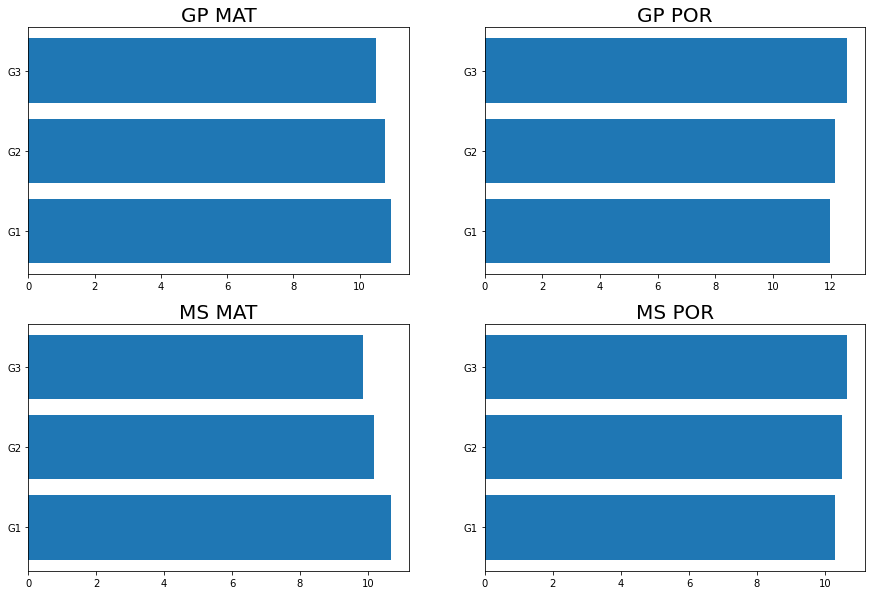

In [14]:
#7
plt.figure(figsize=(15,10))
ax1=plt.subplot(221)
ax2=plt.subplot(222)
ax3=plt.subplot(223)
ax4=plt.subplot(224)

ax1.barh(avg_gp_mat.index,avg_gp_mat.values)
ax2.barh(avg_gp_por.index,avg_gp_por.values)
ax3.barh(avg_ms_mat.index,avg_ms_mat.values)
ax4.barh(avg_ms_por.index,avg_ms_por.values)

ax1.set_title("GP MAT",fontsize=20)
ax2.set_title("GP POR",fontsize=20)
ax3.set_title("MS MAT",fontsize=20)
ax4.set_title("MS POR",fontsize=20)

plt.show()

In [15]:
#8
tc_gp_mat=gp_mat["absences"].max()
tc_gp_por=gp_por["absences"].max()
tc_ms_mat=ms_mat["absences"].max()
tc_ms_por=ms_por["absences"].max()
print("El total de clases de gp mat es :",tc_gp_mat)
print("El total de clases de gp por es :",tc_gp_por)
print("El total de clases de ms mat es :",tc_ms_mat)
print("El total de clases de ms por es :",tc_ms_por)
total_clases=max([tc_gp_mat,tc_gp_por,tc_ms_mat,tc_ms_por])
print("El total de clases es:",total_clases)

El total de clases de gp mat es : 75
El total de clases de gp por es : 32
El total de clases de ms mat es : 17
El total de clases de ms por es : 12
El total de clases es: 75


In [22]:

def per_attendace(total_clases,abscenses):
    
    per= (100*(total_clases-abscenses))/total_clases
    
    return per

In [16]:
#9 linea llamada extra
import numpy as np

gp_mat['extra']=0
gp_por['extra']=0
ms_mat['extra']=0
ms_por['extra']=0

In [17]:
#10 columna llamada approved
gp_mat['approved']=0
gp_por['approved']=0
ms_mat['approved']=0
ms_por['approved']=0

In [19]:
def aprov(per,g3):
    
    if per < 80:
        approved =0
        extra = 0
        
    else:
        if g3 <10:
            approved =0
            extra = 0
            
        elif 10 <= g3 <= 15:
            approved =1
            extra = 1
        elif 15 < g3:
            approved =1
            extra = 0
    return approved,extra

approved,extra=aprov(80,12)
print(approved)
print(extra)

1
1


In [24]:
#display(HTML(gp_mat.to_html()))

# para el colegio gp_mat

for index in range(len(gp_mat)):
    
    abscences=gp_mat["absences"][index]
    g3=gp_mat["G3"][index]
    porcentaje=per_attendace(total_clases,abscences)
    approved,extra=aprov(porcentaje,g3)
    gp_mat["approved"][index]=int(approved)
    gp_mat["extra"][index]=int(extra)
    
    
#     print("falta: ",abscences)
#     print(" porcentaje : ",porcentaje ,"%")
#     print("G3: ",g3)
#     print("aprovado: {}, trabajo extra: {}".format(approved,extra))
    
#display(HTML(gp_mat.to_html())) 

C:\Users\fliaa\AppData\Local\Temp\ipykernel_15028\1938373978.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gp_mat["approved"][index]=int(approved)
C:\Users\fliaa\AppData\Local\Temp\ipykernel_15028\1938373978.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gp_mat["extra"][index]=int(extra)


In [23]:
# para el colegio gp_por
for index in range(len(gp_por)):
    
    abscences=gp_por["absences"][index]
    g3=gp_por["G3"][index]
    porcentaje=per_attendace(total_clases,abscences)
    approved,extra=aprov(porcentaje,g3)
    gp_por["approved"][index]=int(approved)
    gp_por["extra"][index]=int(extra)      
#     print("falta: ",abscences)
#     print(" porcentaje : ",porcentaje ,"%")
#     print("G3: ",g3)
#     print("aprovado: {}, trabajo extra: {}".format(approved,extra))
    
display(HTML(gp_por.to_html()))

C:\Users\fliaa\AppData\Local\Temp\ipykernel_15028\936092161.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gp_por["approved"][index]=int(approved)
C:\Users\fliaa\AppData\Local\Temp\ipykernel_15028\936092161.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gp_por["extra"][index]=int(extra)


,school,sex,age,address,Pstatus,guardian,traveltime,studytime,failures,paid,internet,health,absences,G1,G2,G3,extra,approved
0,GP,F,18,U,A,mother,2,2,0,no,no,3,4,0,11,11,1,1
1,GP,F,17,U,T,father,1,2,0,no,yes,3,2,9,11,11,1,1
2,GP,F,15,U,T,mother,1,2,0,no,yes,3,6,12,13,12,1,1
3,GP,F,15,U,T,mother,1,3,0,no,yes,5,0,14,14,14,1,1
4,GP,F,16,U,T,father,1,2,0,no,no,5,0,11,13,13,1,1
5,GP,M,16,U,T,mother,1,2,0,no,yes,5,6,12,12,13,1,1
6,GP,M,16,U,T,mother,1,2,0,no,yes,3,0,13,12,13,1,1
7,GP,F,17,U,A,mother,2,2,0,no,no,1,2,10,13,13,1,1
8,GP,M,15,U,A,mother,1,2,0,no,yes,1,0,15,16,17,0,1
9,GP,M,15,U,T,mother,1,2,0,no,yes,5,0,12,12,13,1,1


In [25]:
#para el colegio ms se necesita reiniciar el index
ms_mat = ms_mat.reset_index()
del ms_mat['index']
#display(HTML(ms_mat.to_html())) 

In [26]:
# para el colegio ms_mat
for index in range(len(ms_mat)):
    
    abscences=ms_mat["absences"][index]
    g3=ms_mat["G3"][index]
    porcentaje=per_attendace(total_clases,abscences)
    approved,extra=aprov(porcentaje,g3)
    ms_mat["approved"][index]=int(approved)
    ms_mat["extra"][index]=int(extra)
    
    
#     print("falta: ",abscences)
#     print(" porcentaje : ",porcentaje ,"%")
#     print("G3: ",g3)
#     print("aprovado: {}, trabajo extra: {}".format(approved,extra))
    
display(HTML(ms_mat.to_html()))

C:\Users\fliaa\AppData\Local\Temp\ipykernel_15028\3450631070.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ms_mat["approved"][index]=int(approved)
C:\Users\fliaa\AppData\Local\Temp\ipykernel_15028\3450631070.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ms_mat["extra"][index]=int(extra)


,school,sex,age,address,Pstatus,guardian,traveltime,studytime,failures,paid,internet,health,absences,G1,G2,G3,extra,approved
0,MS,M,18,R,T,mother,2,1,1,no,yes,5,10,11,13,13,1,1
1,MS,M,19,R,T,other,3,2,3,no,yes,2,8,8,7,8,0,0
2,MS,M,17,U,T,mother,2,2,0,yes,yes,3,2,13,13,13,1,1
3,MS,M,18,U,T,mother,1,1,1,no,yes,3,7,8,7,8,0,0
4,MS,M,19,R,T,other,3,1,1,no,yes,5,4,8,8,8,0,0
5,MS,M,17,R,T,mother,2,2,0,yes,yes,2,4,13,11,11,1,1
6,MS,F,18,U,T,father,1,2,0,no,no,5,0,10,9,9,0,0
7,MS,F,17,R,T,father,2,2,0,yes,yes,5,4,12,13,13,1,1
8,MS,F,17,U,A,mother,2,2,0,no,no,5,2,12,12,11,1,1
9,MS,M,18,U,T,father,2,1,0,no,yes,3,4,10,10,10,1,1


In [28]:
ms_por = ms_por.reset_index()
del ms_por['index']
#display(HTML(ms_por.to_html())) 

In [29]:
# para el colegio ms_por
for index in range(len(ms_por)):
    
    abscences=ms_por["absences"][index]
    g3=ms_por["G3"][index]
    porcentaje=per_attendace(total_clases,abscences)
    approved,extra=aprov(porcentaje,g3)
    ms_por["approved"][index]=int(approved)
    ms_por["extra"][index]=int(extra)
#     print("falta: ",abscences)
#     print(" porcentaje : ",porcentaje ,"%")
#     print("G3: ",g3)
#     print("aprovado: {}, trabajo extra: {}".format(approved,extra))
    
display(HTML(ms_por.to_html()))   

C:\Users\fliaa\AppData\Local\Temp\ipykernel_15028\1360906498.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ms_por["approved"][index]=int(approved)
C:\Users\fliaa\AppData\Local\Temp\ipykernel_15028\1360906498.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ms_por["extra"][index]=int(extra)


,school,sex,age,address,Pstatus,guardian,traveltime,studytime,failures,paid,internet,health,absences,G1,G2,G3,extra,approved
0,MS,F,16,U,T,father,2,1,0,no,yes,5,11,10,11,11,1,1
1,MS,F,16,R,T,mother,2,2,0,no,yes,5,0,12,12,12,1,1
2,MS,F,15,R,T,mother,1,1,1,no,no,2,6,10,10,10,1,1
3,MS,F,15,R,T,mother,2,1,0,no,yes,5,4,10,10,11,1,1
4,MS,F,16,R,T,mother,2,2,0,no,no,5,0,16,17,17,0,1
5,MS,F,15,R,T,mother,2,1,0,no,no,1,0,6,8,9,0,0
6,MS,M,16,R,A,mother,1,2,0,no,no,2,5,10,11,11,1,1
7,MS,M,16,U,A,mother,1,3,0,no,yes,5,0,10,11,11,1,1
8,MS,F,17,R,T,father,1,2,1,no,no,5,0,10,10,10,1,1
9,MS,F,17,R,T,father,1,1,1,no,yes,5,0,6,6,7,0,0


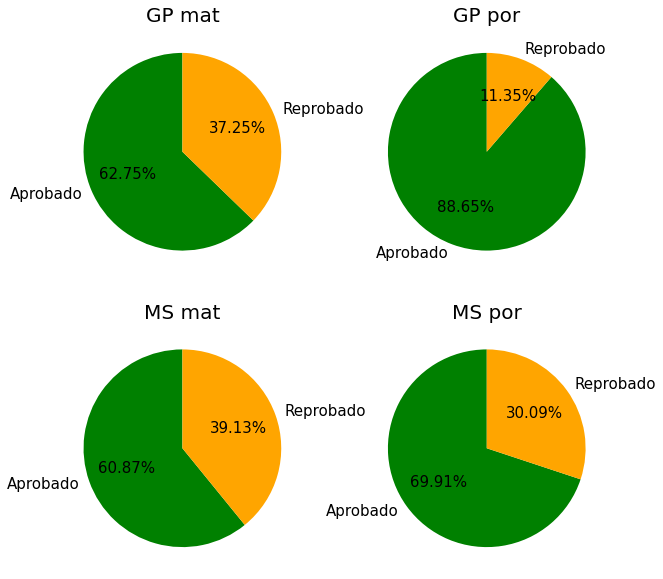

In [30]:
#11 graficas
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
ax1=plt.subplot(221)
ax2=plt.subplot(222)
ax3=plt.subplot(223)
ax4=plt.subplot(224)

ax1.pie(gp_mat["approved"].value_counts(),labels=["Aprobado","Reprobado"],autopct="%.2f%%",colors=["green","orange"],startangle=90,textprops={"fontsize":15})
ax2.pie(gp_por["approved"].value_counts(),labels=["Aprobado","Reprobado"],autopct="%.2f%%",colors=["green","orange"],startangle=90,textprops={"fontsize":15})
ax3.pie(ms_mat["approved"].value_counts(),labels=["Aprobado","Reprobado"],autopct="%.2f%%",colors=["green","orange"],startangle=90,textprops={"fontsize":15})
ax4.pie(ms_por["approved"].value_counts(),labels=["Aprobado","Reprobado"],autopct="%.2f%%",colors=["green","orange"],startangle=90,textprops={"fontsize":15})

ax1.set_title("GP mat",fontsize=20)
ax2.set_title("GP por",fontsize=20)
ax3.set_title("MS mat",fontsize=20)
ax4.set_title("MS por",fontsize=20)

plt.show()

In [32]:
#guardar
from datetime import datetime

date = datetime.now().strftime("%d-%m-%Y")
print(date)


#Guardando los dataframes en un archivo .csv
def guardarCSV(df, nombre, fecha):
    nombre = nombre + "_" + fecha + '.csv'
    print(nombre)
    df.to_csv(nombre, index = True)

guardarCSV(gp_mat, "Resultado_GP_Matematicas", date)
guardarCSV(gp_por, "Resultado_GP_Portugues", date)
guardarCSV(ms_mat, "Resultado_MS_Matematicas", date)
guardarCSV(ms_por, "Resultado_MS_Portugues", date)

24-01-2023
Resultado_GP_Matematicas_24-01-2023.csv
Resultado_GP_Portugues_24-01-2023.csv
Resultado_MS_Matematicas_24-01-2023.csv
Resultado_MS_Portugues_24-01-2023.csv
